# Human Development Index and Components

## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv('dataset/Human.csv', encoding='latin-1', delimiter=',', quotechar='"')

In [3]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Unnamed: 10,Unnamed: 11
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3,NaN,NaN
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1,NaN,NaN
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2,NaN,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4,NaN,NaN
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5,NaN,NaN


In [4]:
data.shape

(195, 12)

In [5]:
data['HUMAN DEVELOPMENT'].value_counts()

VERY HIGH     66
HIGH          49
MEDIUM        44
LOW           32
OTHER          4
Name: HUMAN DEVELOPMENT, dtype: int64

In [6]:
data.groupby('HUMAN DEVELOPMENT').mean()

,HDI rank,Life expectancy at birth,Unnamed: 10,Unnamed: 11
HUMAN DEVELOPMENT,,,,
HIGH,90.693878,72.093878,NaN,NaN
LOW,175.437500,61.056250,NaN,NaN
MEDIUM,137.340909,66.775000,NaN,NaN
OTHER,193.500000,69.525000,NaN,NaN
VERY HIGH,33.318182,78.736364,NaN,NaN


In [7]:
data['Gross national income (GNI) per capita']

0      66,933
1      64,660
2      55,782
3      62,607
4      49,238
        ...  
190       768
191        ..
192        ..
193    17,730
194     1,018
Name: Gross national income (GNI) per capita, Length: 195, dtype: object

## Analysis Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [9]:
data.describe()

,HDI rank,Life expectancy at birth,Unnamed: 10,Unnamed: 11
count,195.000000,195.000000,0.0,0.0
mean,97.815385,71.277949,NaN,NaN
std,56.467551,7.746484,NaN,NaN
min,1.000000,52.500000,NaN,NaN
25%,49.500000,65.700000,NaN,NaN
50%,97.000000,71.700000,NaN,NaN
75%,146.000000,76.700000,NaN,NaN
max,195.000000,85.900000,NaN,NaN


In [10]:
countries = data['Country'].unique()

In [11]:
countries.shape

(195,)

### Missed Value

In [12]:
data.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [13]:
data.isnull().values.sum()

0

In [14]:
data.isnull().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64

In [ ]:
data = data.fillna(data.median())

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data['Human Development Index (HDI) ']

In [ ]:
data.duplicated(keep='first').sum()

In [ ]:
data.duplicated(keep='last').sum()

In [ ]:
data

In [ ]:
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
data.interpolate(method='linear', inplace=True, axis=0)

### Convert data type

In [15]:
def df_convert_dtype(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [ ]:
numerical_data = data.iloc[:, 3:]

In [ ]:
numerical_data.head()

In [ ]:
data.info()

In [ ]:
converted_columns = numerical_data.select_dtypes(np.object_).columns

In [ ]:
converted_columns

In [ ]:
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].str.replace(',', '.')

In [ ]:
data[converted_columns] = df_convert_dtype(data[converted_columns], np.object_, np.float64)

In [ ]:
numerical_data_cols = numerical_data.columns

In [ ]:
corr = data.corr()

### Visualation Data

In [16]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5


In [17]:
data = data.drop('HDI rank.1', axis=1)

In [18]:
data.set_index('HDI rank', inplace=True)

In [19]:
regions = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (Kingdom of)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
     'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea (Democratic People\'s Republic of)', 'Korea (Republic of)', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
     'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
     'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'The Caribbean': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guyana', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago'],
     'North America': ['Canada', 'United States'],
    'Central America': ['Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama'],
    'South America': ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)']
}
data['Region'] = data['Country'].map({country: region for region, countries in regions.items() for country in countries})

In [20]:
data.head()

,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Region
HDI rank,,,,,,,,,
1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,Europe
2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,Europe
3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,Europe
4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,NaN
5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,Oceania


In [21]:
data.groupby('Region')['Life expectancy at birth'].mean().round()

Region
Africa             63.0
Asia               73.0
Central America    72.0
Europe             79.0
North America      80.0
Oceania            70.0
South America      73.0
The Caribbean      72.0
Name: Life expectancy at birth, dtype: float64

In [22]:
data['Mean years of schooling'] = data['Mean years of schooling'].replace('..', np.nan).str.replace(',', '').astype(float)

In [23]:
data['Expected years of schooling'] = data['Expected years of schooling'].replace('..', np.nan).str.replace(',', '').astype(float)


In [24]:
data.groupby('Region')['Expected years of schooling'].mean()

Region
Africa             10.974510
Asia               13.302326
Central America    12.928571
Europe             16.232500
North America      16.350000
Oceania            13.364286
South America      15.210000
The Caribbean      13.925000
Name: Expected years of schooling, dtype: float64

In [25]:
data.describe()

,Life expectancy at birth,Expected years of schooling,Mean years of schooling
count,195.000000,193.000000,191.000000
mean,71.277949,13.506736,8.983770
std,7.746484,2.920314,3.173193
min,52.500000,5.500000,2.100000
25%,65.700000,11.500000,6.250000
50%,71.700000,13.400000,9.300000
75%,76.700000,15.600000,11.500000
max,85.900000,21.100000,14.100000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 195 non-null    object 
 1   HUMAN DEVELOPMENT                       195 non-null    object 
 2   Human Development Index (HDI)           195 non-null    object 
 3   Life expectancy at birth                195 non-null    float64
 4   Expected years of schooling             193 non-null    float64
 5   Mean years of schooling                 191 non-null    float64
 6   Gross national income (GNI) per capita  195 non-null    object 
 7   GNI per capita rank minus HDI rank      195 non-null    object 
 8   Region                                  185 non-null    object 
dtypes: float64(3), object(6)
memory usage: 15.2+ KB


In [27]:
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].replace('..', np.nan).str.replace(',', '').astype(float)
data.groupby('Region')['Gross national income (GNI) per capita'].mean()

Region
Africa              5415.346154
Asia               21611.162791
Central America    13252.714286
Europe             43419.925000
North America      55786.500000
Oceania            12518.571429
South America      14334.000000
The Caribbean      14644.500000
Name: Gross national income (GNI) per capita, dtype: float64

In [28]:
data['Human Development Index (HDI) '] = data['Human Development Index (HDI) '].replace('..', np.nan).str.replace(',', '').astype(float)
data.groupby('Region')['Human Development Index (HDI) '].mean()

Region
Africa             0.558020
Asia               0.736070
Central America    0.708857
Europe             0.883100
North America      0.928500
Oceania            0.699846
South America      0.761400
The Caribbean      0.741250
Name: Human Development Index (HDI) , dtype: float64

In [29]:
data['GNI per capita rank minus HDI rank'] = data['GNI per capita rank minus HDI rank'].replace('..', np.nan).astype(float)
data.groupby('Region')['GNI per capita rank minus HDI rank'].mean()

Region
Africa             -5.529412
Asia               -2.000000
Central America    -5.571429
Europe              3.150000
North America      -2.500000
Oceania            14.153846
South America       5.800000
The Caribbean       0.750000
Name: GNI per capita rank minus HDI rank, dtype: float64

<AxesSubplot:xlabel='Human Development Index (HDI) '>

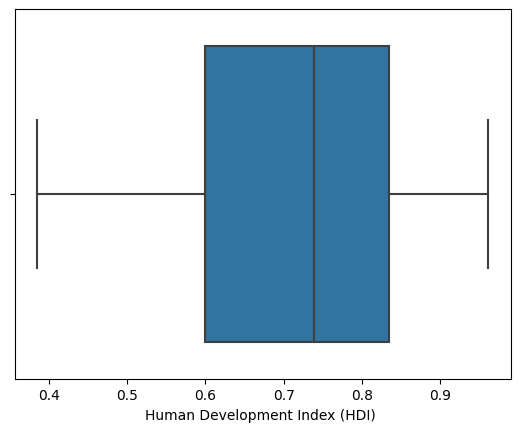

In [30]:
sns.boxplot(x=data['Human Development Index (HDI) '])

In [34]:
def boxplot_columns(df):
    
    cols = df.select_dtypes(np.number).columns
    for col in cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=data[col])
        

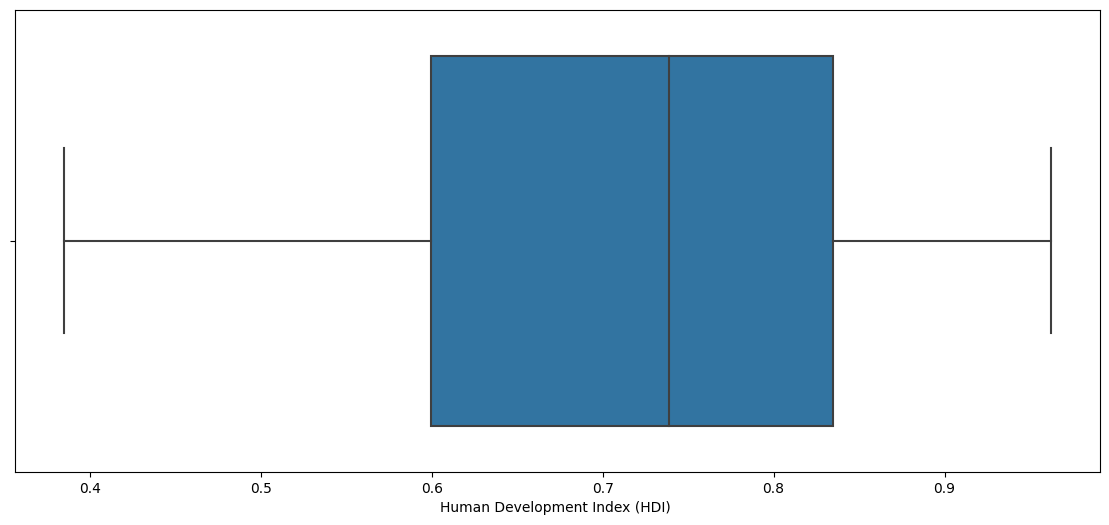

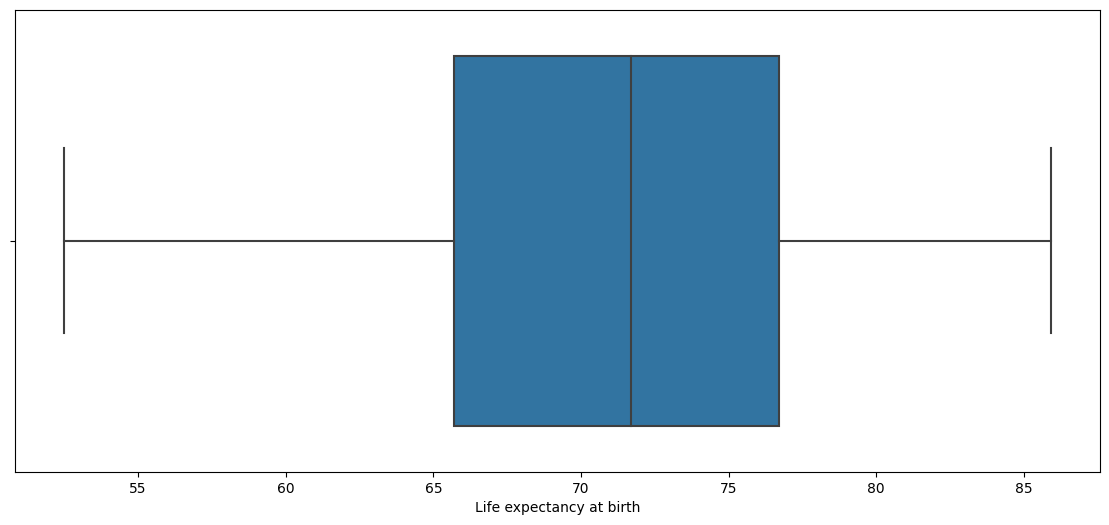

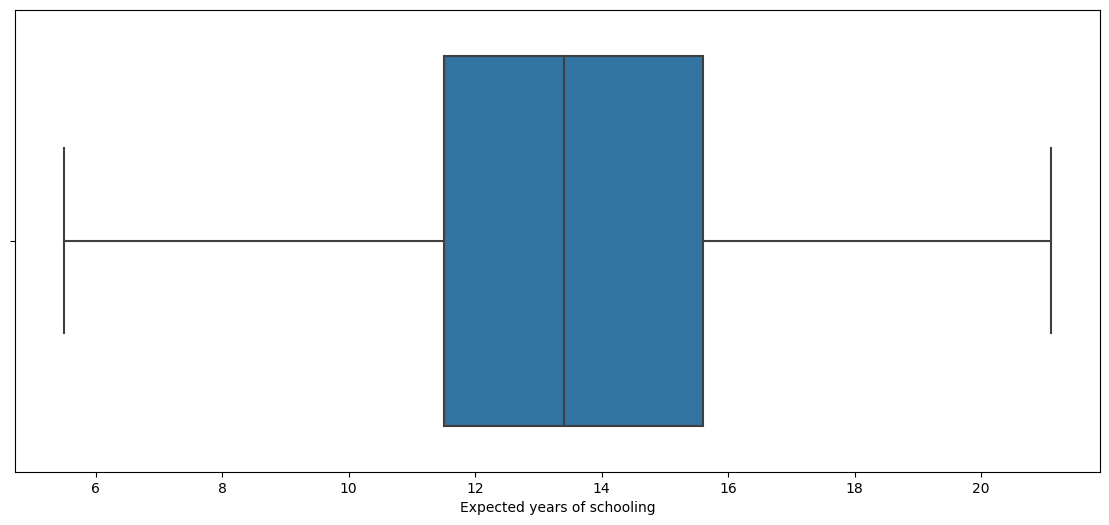

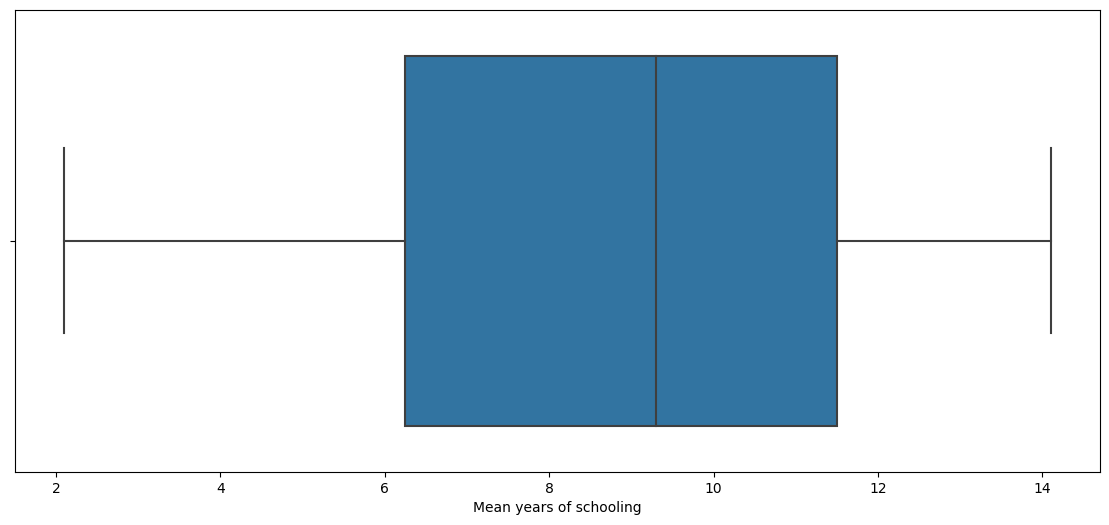

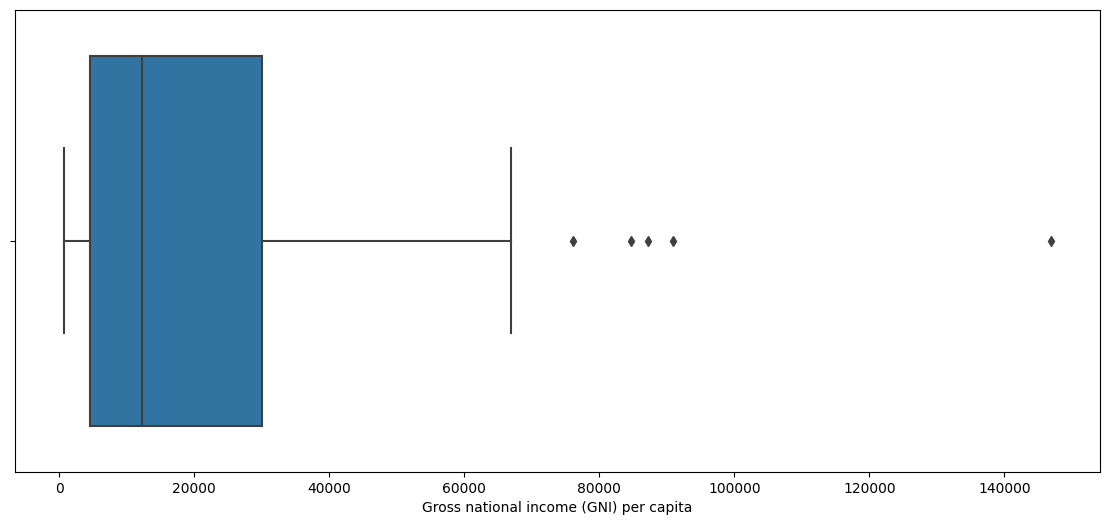

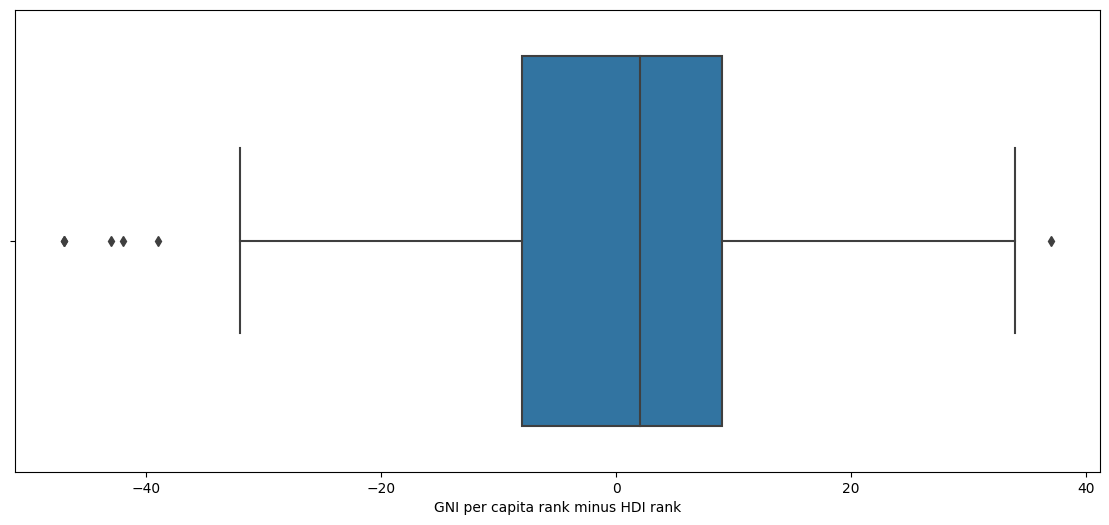

In [35]:
boxplot_columns(data)

In [36]:
data.loc[data['Gross national income (GNI) per capita'] > 90000, 'Gross national income (GNI) per capita'] = np.nan

In [37]:
data.loc[data['Gross national income (GNI) per capita'] < 90000, 'Gross national income (GNI) per capita']

HDI rank
1      66933.0
2      64660.0
3      55782.0
4      62607.0
5      49238.0
        ...   
189     1240.0
190     1364.0
191      768.0
194    17730.0
195     1018.0
Name: Gross national income (GNI) per capita, Length: 191, dtype: float64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 195 non-null    object 
 1   HUMAN DEVELOPMENT                       195 non-null    object 
 2   Human Development Index (HDI)           191 non-null    float64
 3   Life expectancy at birth                195 non-null    float64
 4   Expected years of schooling             193 non-null    float64
 5   Mean years of schooling                 191 non-null    float64
 6   Gross national income (GNI) per capita  191 non-null    float64
 7   GNI per capita rank minus HDI rank      191 non-null    float64
 8   Region                                  185 non-null    object 
dtypes: float64(6), object(3)
memory usage: 15.2+ KB


#### Correlation 

In [39]:
correlation = data.corr(method='pearson')
print(correlation['Human Development Index (HDI) '].sort_values(ascending=False).to_string())

Human Development Index (HDI)             1.000000
Mean years of schooling                   0.909068
Life expectancy at birth                  0.905833
Expected years of schooling               0.895548
Gross national income (GNI) per capita    0.831135
GNI per capita rank minus HDI rank        0.130059


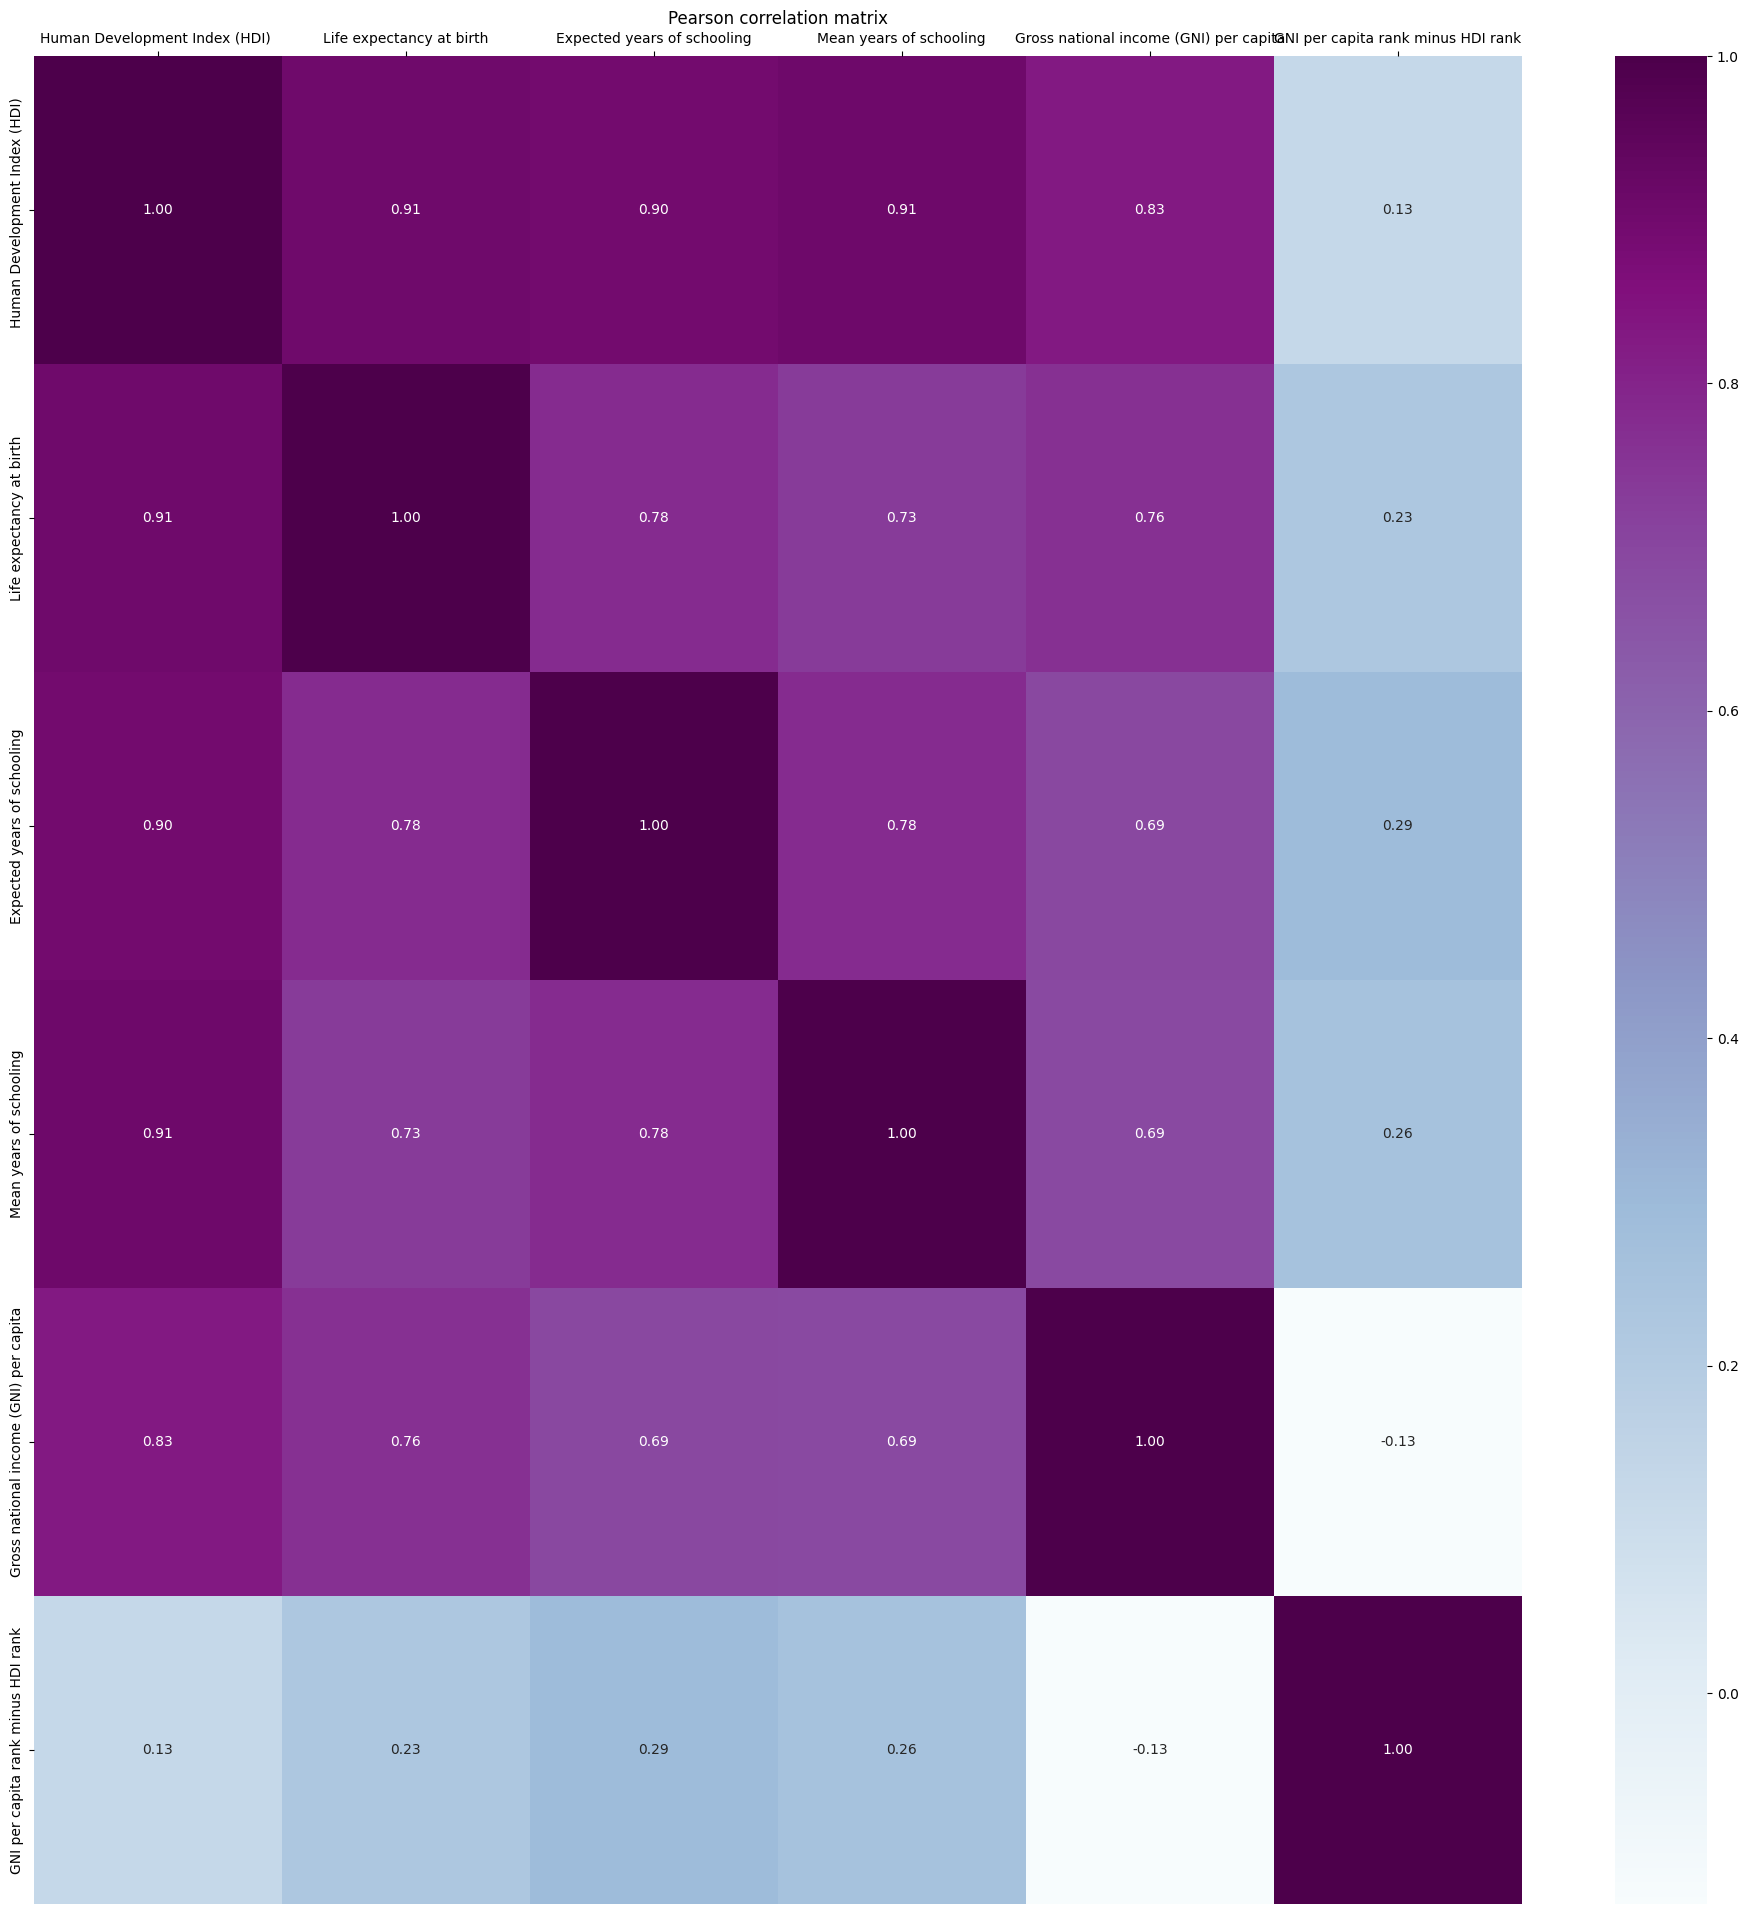

In [40]:
plt.figure(figsize=(24, 24))
ax = sns.heatmap(correlation, annot=True, cmap=plt.cm.BuPu, fmt='.2f')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.title('Pearson correlation matrix')
plt.show()

In [41]:
data.drop('GNI per capita rank minus HDI rank', axis=1, inplace=True)

In [42]:
data.head()

,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Region
HDI rank,,,,,,,,
1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66933.0,Europe
2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64660.0,Europe
3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55782.0,Europe
4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62607.0,NaN
5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49238.0,Oceania


In [43]:
high_correlated = abs(correlation[correlation > 0.75])
print(high_correlated[high_correlated <  1.0].stack().to_string())

Human Development Index (HDI)           Life expectancy at birth                  0.905833
                                        Expected years of schooling               0.895548
                                        Mean years of schooling                   0.909068
                                        Gross national income (GNI) per capita    0.831135
Life expectancy at birth                Human Development Index (HDI)             0.905833
                                        Expected years of schooling               0.777174
                                        Gross national income (GNI) per capita    0.763798
Expected years of schooling             Human Development Index (HDI)             0.895548
                                        Life expectancy at birth                  0.777174
                                        Mean years of schooling                   0.778115
Mean years of schooling                 Human Development Index (HDI)             0.909068

In [47]:
independent_vars = ['Life expectancy at birth', 'Expected years of schooling',
                    'Mean years of schooling', 'Gross national income (GNI) per capita']
dependent_var = 'Human Development Index (HDI) '
data_copy = data[independent_vars + [dependent_var]].copy()
data_copy[independent_vars] = data_copy[independent_vars].apply(pd.to_numeric, errors='coerce')
data_copy[dependent_var] = data_copy[dependent_var].astype(float)

data = data.dropna()

# Perform the regression analysis
X = data[independent_vars]
X = sm.add_constant(X)  # Add a constant term
y = data[dependent_var]

model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Human Development Index (HDI)    R-squared:                       0.980
Model:                                        OLS   Adj. R-squared:                  0.980
Method:                             Least Squares   F-statistic:                     2158.
Date:                            Mon, 19 Jun 2023   Prob (F-statistic):          1.06e-147
Time:                                    15:32:18   Log-Likelihood:                 438.21
No. Observations:                             180   AIC:                            -866.4
Df Residuals:                                 175   BIC:                            -850.4
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                             coef    std err          t      P>|t|      [0